# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [2]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('pierce_county_house_sales.csv')
df.head()

df.describe()

# Data looks clean


,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
count,1.681400e+04,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000
mean,4.612332e+05,1879.941953,24.945878,167.852861,364.425122,38.298501,0.889021,1.558285,1980.469252,3.277983,2.317176
std,2.360833e+05,760.419008,102.066417,429.065832,286.454018,164.691471,0.596731,0.512055,33.339025,0.891240,0.827956
min,2.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,0.000000
25%,3.480000e+05,1320.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1959.000000,3.000000,2.000000
50%,4.165000e+05,1774.000000,0.000000,0.000000,420.000000,0.000000,1.000000,2.000000,1990.000000,3.000000,2.000000
75%,5.238065e+05,2352.000000,0.000000,0.000000,528.000000,0.000000,1.000000,2.000000,2006.000000,4.000000,3.000000
max,6.130000e+06,9510.000000,1212.000000,4000.000000,2816.000000,3664.000000,5.000000,3.000000,2021.000000,25.000000,8.000000


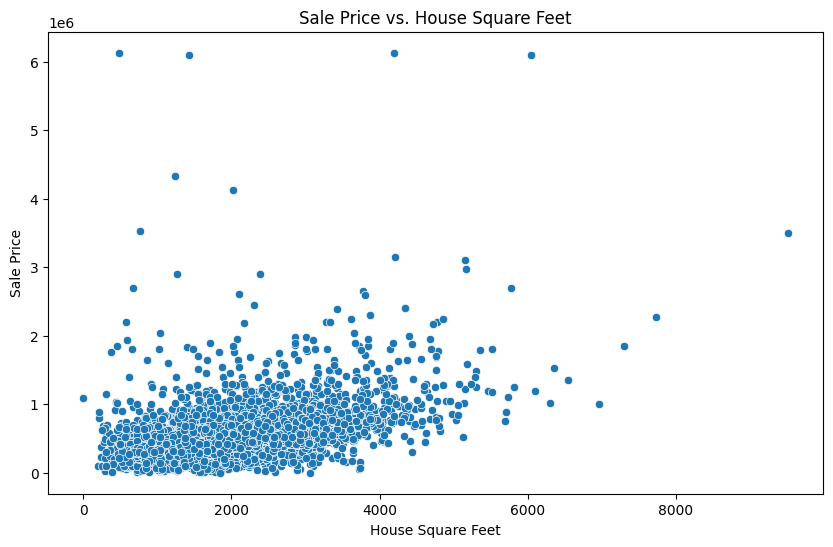

In [3]:
# Sale Price and House Square Feet size

plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_square_feet', y='sale_price', data=df)
plt.title('Sale Price vs. House Square Feet')
plt.xlabel('House Square Feet')
plt.ylabel('Sale Price')
plt.show()

/tmp/ipython-input-4192145286.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='roof_cover', y='sale_price', data=df, ci=None)


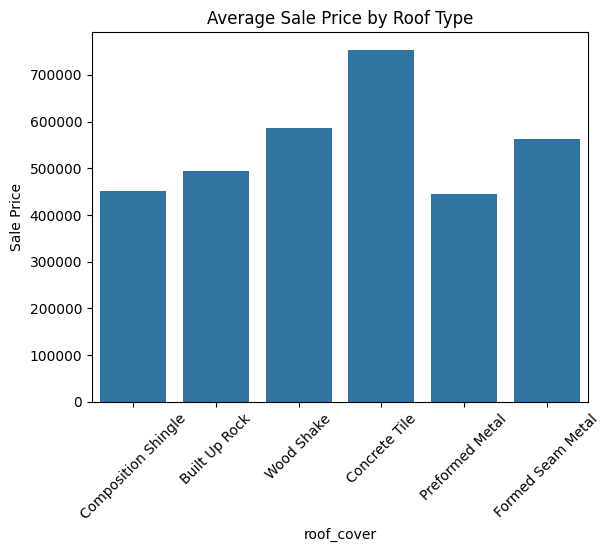

In [11]:
# average sale price by roof type
sns.barplot(x='roof_cover', y='sale_price', data=df, ci=None)
plt.title('Average Sale Price by Roof Type')
plt.xticks(rotation=45)
plt.ylabel('Sale Price')
plt.show()


<Figure size 1200x700 with 0 Axes>

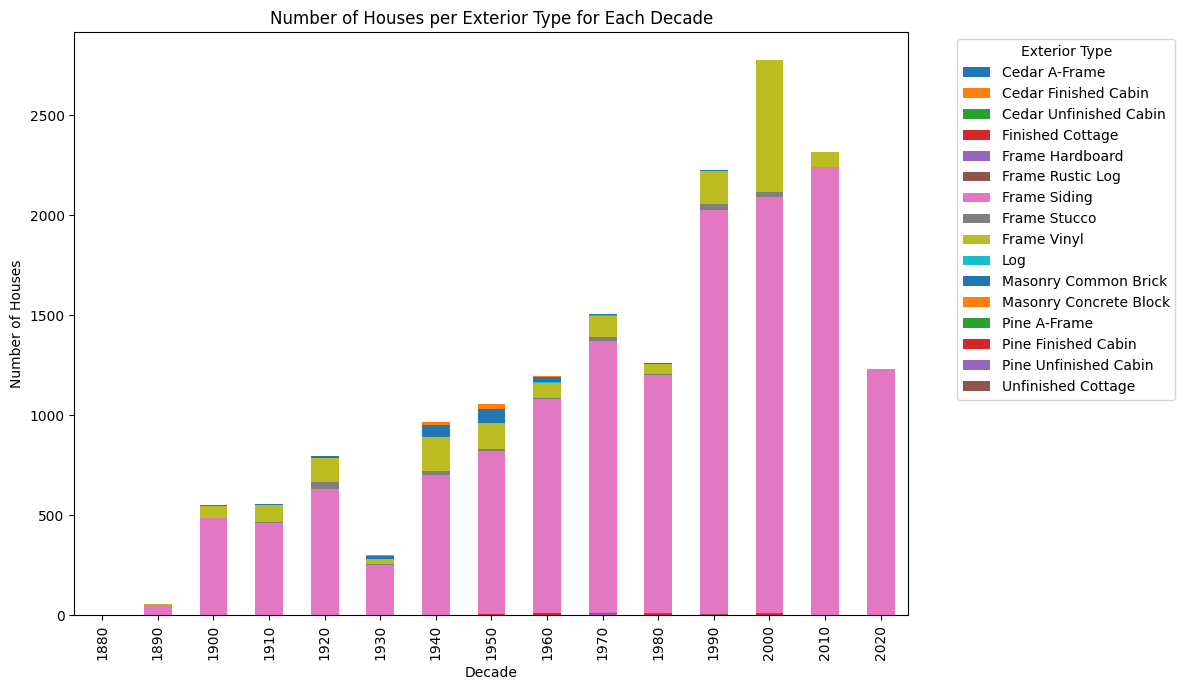

In [10]:
df = pd.read_csv("pierce_county_house_sales.csv")

# create a new column for decade
df['decade'] = (df['year_built'] // 10) * 10

# group by decade and exterior, then count how many houses in each group
grouped = df.groupby(['decade', 'exterior']).size().unstack(fill_value=0)

# plot stacked bar chart
plt.figure(figsize=(12, 7))
grouped.plot(kind = 'bar', stacked = True, figsize = (12, 7))

plt.title('Number of Houses per Exterior Type for Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Houses')
plt.legend(title = 'Exterior Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()


In [7]:
#2
ddf1 = pd.get_dummies(df["hvac_description"])
ddf2 = pd.get_dummies(df["interior"])
ddf3 = pd.get_dummies(df["roof_cover"])
ddf4 = pd.get_dummies(df["waterfront_type"])
ddf5 = pd.get_dummies(df["view_quality"])
ddf6 = pd.get_dummies(df["utility_sewer"])


In [8]:
df = pd.concat([df, ddf1,ddf2,ddf3, ddf4, ddf5 , ddf6],axis=1)

In [9]:
df

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,...,View Good +,View Lim,View Lim +,View Lim -,View V-Good,SEWER AVAILABLE,SEWER/SEPTIC AVAIL,SEWER/SEPTIC INSTALLED,SEWER/SEPTIC NO,SEWER/SEPTIC NO PERC
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,...,False,False,False,False,False,False,False,True,False,False
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,...,False,False,False,False,False,False,False,True,False,False
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,...,False,False,False,False,False,False,False,True,False,False
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,...,False,False,False,False,False,False,False,True,False,False
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,2020-10-01,2000,3062,0,0,438,0,1,Forced Air,Frame Siding,...,False,False,False,False,False,False,False,True,False,False
16810,2020-01-08,96103,1370,0,0,400,0,1,Heat Pump,Frame Siding,...,False,False,False,False,False,False,False,True,False,False
16811,2020-09-21,140000,850,360,810,0,0,1,Forced Air,Frame Vinyl,...,False,False,False,False,False,False,False,True,False,False
16812,2020-05-08,203000,1894,0,0,0,0,1,Electric Baseboard,Frame Siding,...,False,False,False,False,False,False,False,True,False,False


In [14]:
#3

y = df['sale_price'] # target variable vector
X = df.drop(columns=['sale_date', 'sale_price']) # feature matrix

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

In [16]:
#4
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# define predictor and target
X_train1 = X_train[["year_built"]]
y_train1 = y_train
X_test1 = X_test[["year_built"]]
y_test1 = y_test

# fit simple linear regression model
model = LinearRegression()
model.fit(X_train1, y_train1)

# predict on both sets
y_train_pred = model.predict(X_train1)
y_test_pred = model.predict(X_test1)

# compute RMSE and R2
rmse_train = np.sqrt(mean_squared_error(y_train1, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test1, y_test_pred))
r2_train = r2_score(y_train1, y_train_pred)
r2_test = r2_score(y_test1, y_test_pred)

print(f"RMSE (Train): {rmse_train:,.0f}")
print(f"RMSE (Test):  {rmse_test:,.0f}")
print(f"R² (Train):   {r2_train:.3f}")
print(f"R² (Test):    {r2_test:.3f}")


RMSE (Train): 231,885
RMSE (Test):  221,335
R² (Train):   0.054
R² (Test):    0.046


In [17]:
# define predictor and target
X_train2 = X_train[["bedrooms"]]
y_train2 = y_train
X_test2 = X_test[["bedrooms"]]
y_test2 = y_test

# fit simple linear regression model
model = LinearRegression()
model.fit(X_train2, y_train2)

# predict on both sets
y_train_pred = model.predict(X_train2)
y_test_pred = model.predict(X_test2)

# compute RMSE and R2
rmse_train = np.sqrt(mean_squared_error(y_train2, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test2, y_test_pred))
r2_train = r2_score(y_train2, y_train_pred)
r2_test = r2_score(y_test2, y_test_pred)

print(f"RMSE (Train): {rmse_train:,.0f}")
print(f"RMSE (Test):  {rmse_test:,.0f}")
print(f"R² (Train):   {r2_train:.3f}")
print(f"R² (Test):    {r2_test:.3f}")


RMSE (Train): 233,421
RMSE (Test):  221,258
R² (Train):   0.041
R² (Test):    0.047


In [22]:
# define predictor and target
X_train3 = X_train[["house_square_feet"]]
y_train3 = y_train
X_test3 = X_test[["house_square_feet"]]
y_test3 = y_test

# fit simple linear regression model
model = LinearRegression()
model.fit(X_train3, y_train3)

# predict on both sets
y_train_pred = model.predict(X_train3)
y_test_pred = model.predict(X_test3)

# compute RMSE and R2
rmse_train = np.sqrt(mean_squared_error(y_train3, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test3, y_test_pred))
r2_train = r2_score(y_train3, y_train_pred)
r2_test = r2_score(y_test3, y_test_pred)

print(f"RMSE (Train): {rmse_train:,.0f}")
print(f"RMSE (Test):  {rmse_test:,.0f}")
print(f"R² (Train):   {r2_train:.3f}")
print(f"R² (Test):    {r2_test:.3f}")

# This model is the best at capturing the linearity of the data.

RMSE (Train): 203,478
RMSE (Test):  189,351
R² (Train):   0.271
R² (Test):    0.302


Partial R^2:  0.0249807329168924


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

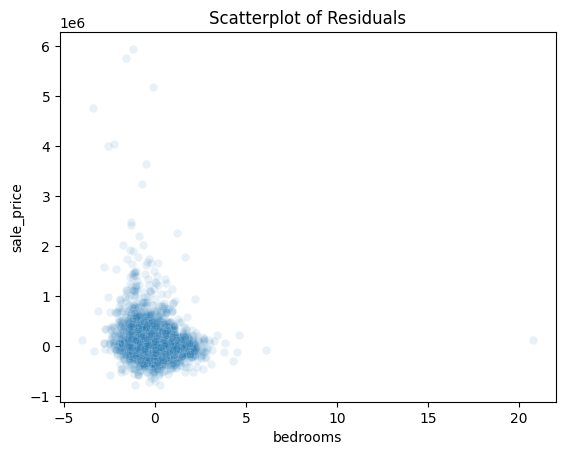

In [25]:
# 5

var =  'bedrooms'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)
## 3. Plot r_y against r_k
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals')

Partial R^2:  0.16964284980345123


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

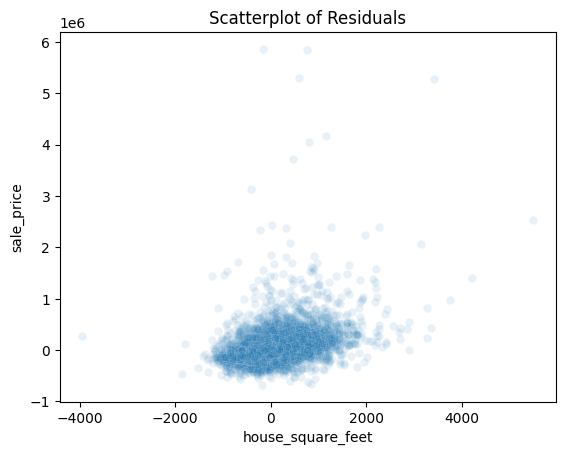

In [26]:
var =  'house_square_feet'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)
## 3. Plot r_y against r_k
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals')

Partial R^2:  0.012652457595132782


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

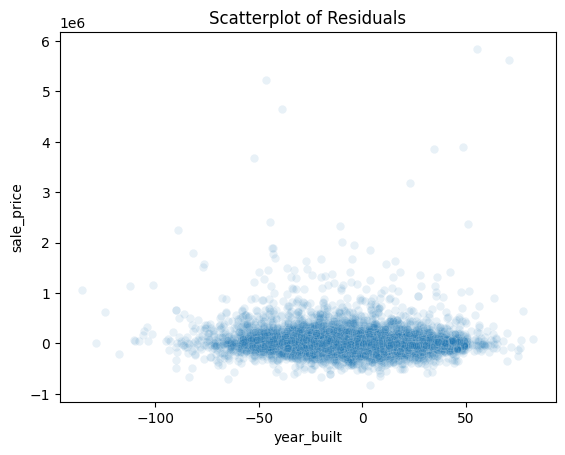

In [27]:
var =  'year_built'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)
## 3. Plot r_y against r_k
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals')

In [28]:
# There are no significant non linearities for the three numeric variables.

In [29]:
# 6